In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [3]:
DATA = pd.read_csv("updated_pollution_dataset.csv")
X = DATA.drop(columns=["Air Quality"])
Y = DATA["Air Quality"]
oh = OneHotEncoder(sparse_output=False)
Y = oh.fit_transform(np.array(Y).reshape(-1,1))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
preprocessor = StandardScaler()
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [8]:
model = keras.models.Sequential()
model.add(layers.Dense(128, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))  # Add dropout for regularization
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(Y.shape[1], activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 128)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,748 (45.89 KB)

 Trainable params: 11,748 (45.89 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(X_train, Y_train, epochs=80, batch_size=32, validation_data=(X_test, Y_test))
results = model.evaluate(X_test, Y_test)
print("Loss:", results[0])
print("Accuracy:", results[1]*100,"%")
print(history.history.keys())

Epoch 1/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6136 - loss: 0.9575 - val_accuracy: 0.8960 - val_loss: 0.2656
Epoch 2/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8682 - loss: 0.3224 - val_accuracy: 0.9240 - val_loss: 0.1920
Epoch 3/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9046 - loss: 0.2357 - val_accuracy: 0.9430 - val_loss: 0.1672
Epoch 4/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9126 - loss: 0.2133 - val_accuracy: 0.9260 - val_loss: 0.1708
Epoch 5/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9178 - loss: 0.2024 - val_accuracy: 0.9360 - val_loss: 0.1527
Epoch 6/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9339 - loss: 0.1778 - val_accuracy: 0.9430 - val_loss: 0.1448
Epoch 7/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9387 - loss: 0.1649 - val_accuracy: 0.9490 - val_loss: 0.1361
Epoch 8/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9361 - loss: 0.1632 - val_accuracy: 0.

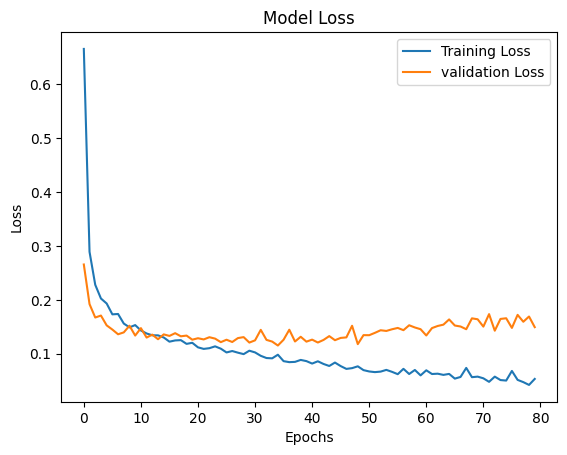

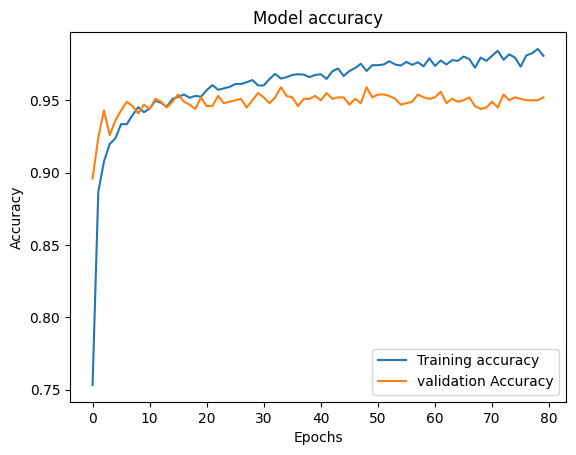

In [7]:
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="validation Accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()